In [1]:
# add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES']='0'

import numpy as np
import cv2 as cv
import pandas as pd
from matplotlib import pyplot as plt

from detection.inference.detector import lesion_detector, post_process_pred

Using model /home/ricardo/projects/CEM-Detect/detection/training/results/standard_split_wVal/normal_fine-tuning/model_0002499.pth
[03/08 01:49:04 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/ricardo/projects/CEM-Detect/detection/training/results/standard_split_wVal/normal_fine-tuning/model_0002499.pth ...


/home/ricardo/miniconda3/envs/detectron-new/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


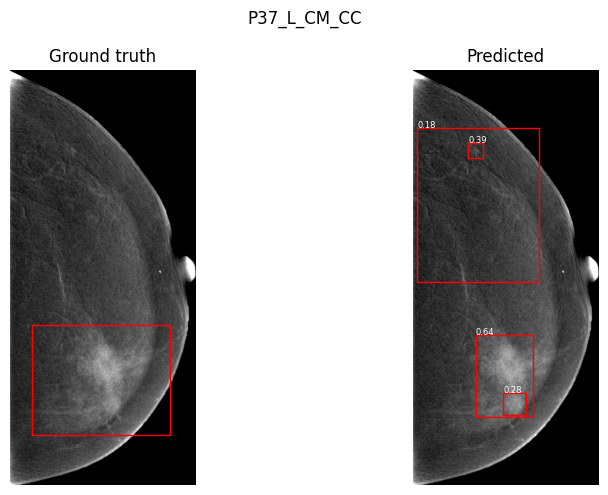

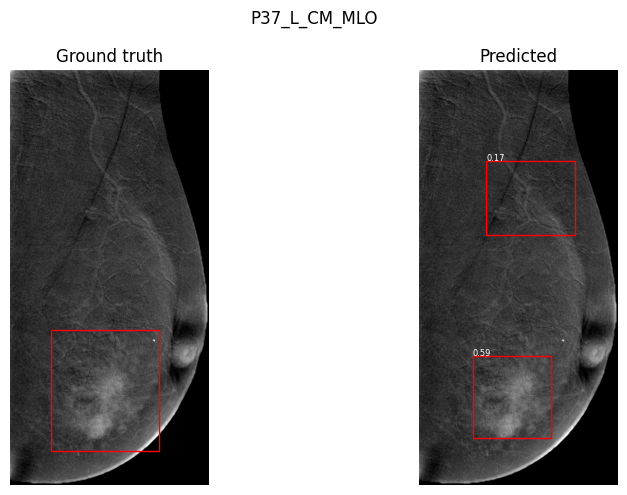

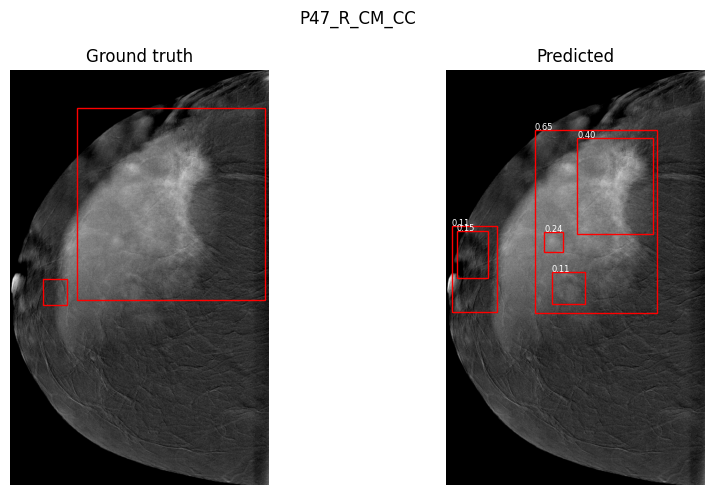

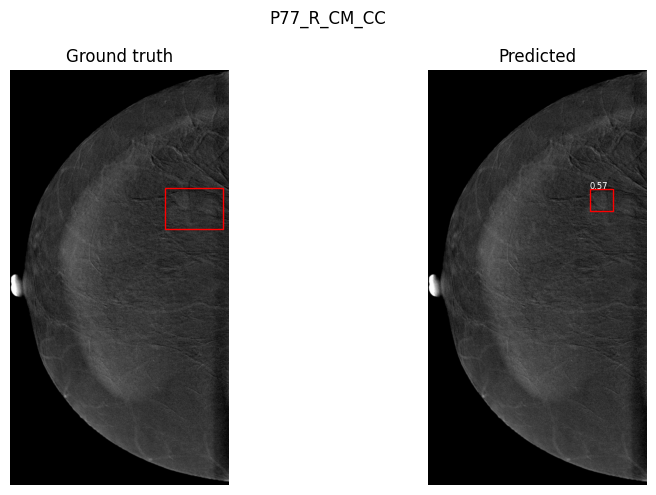

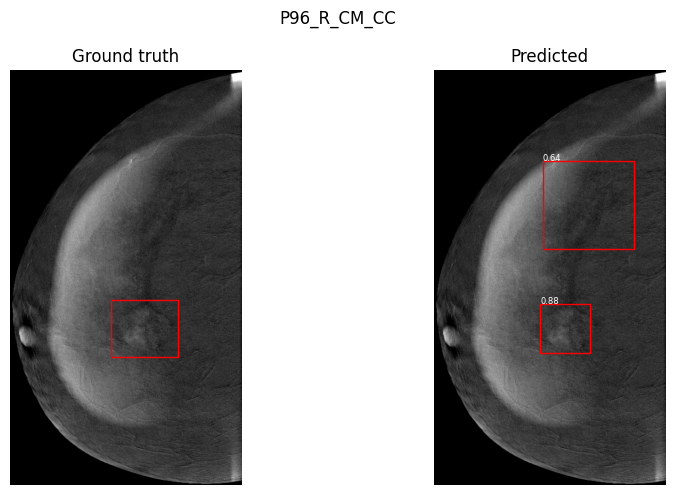

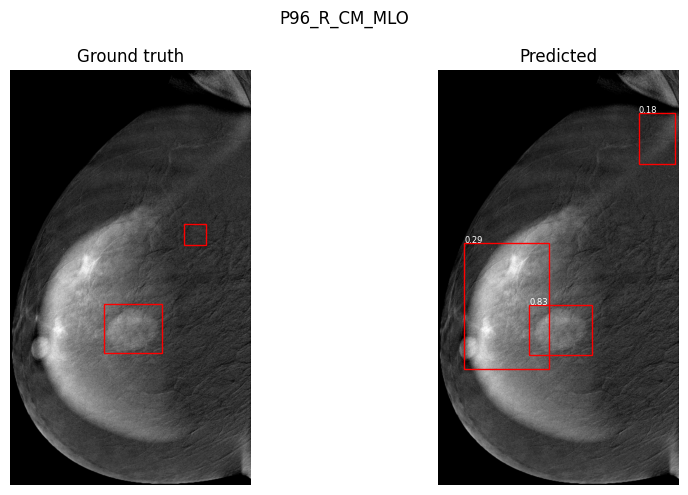

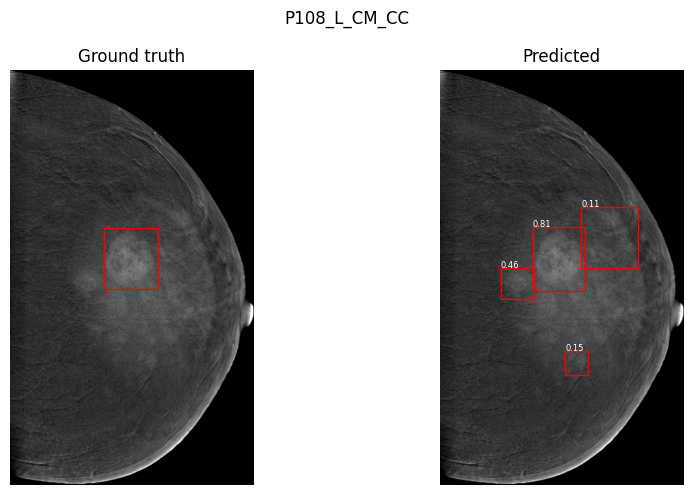

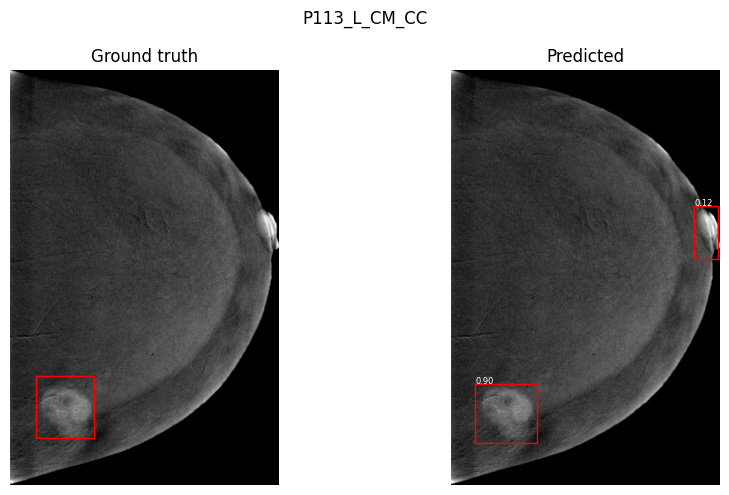

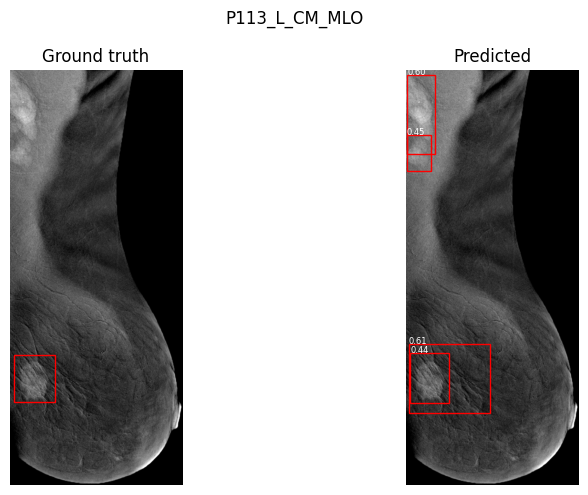

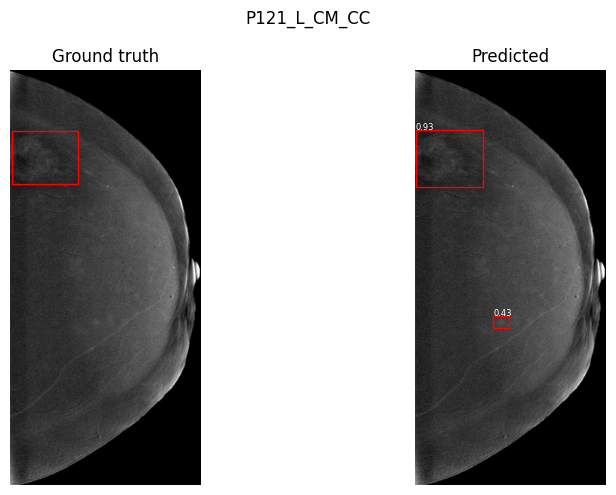

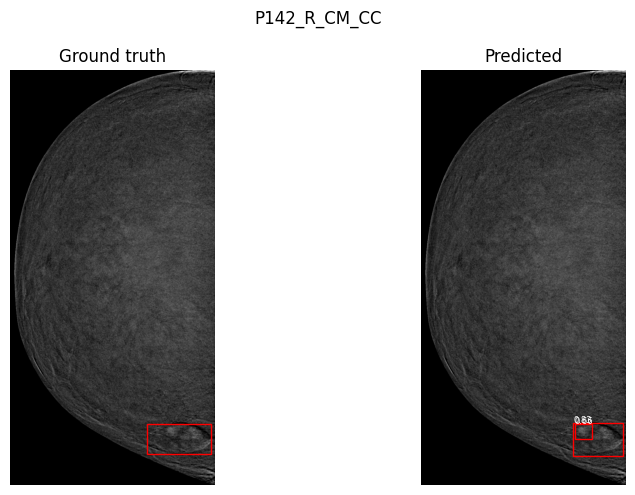

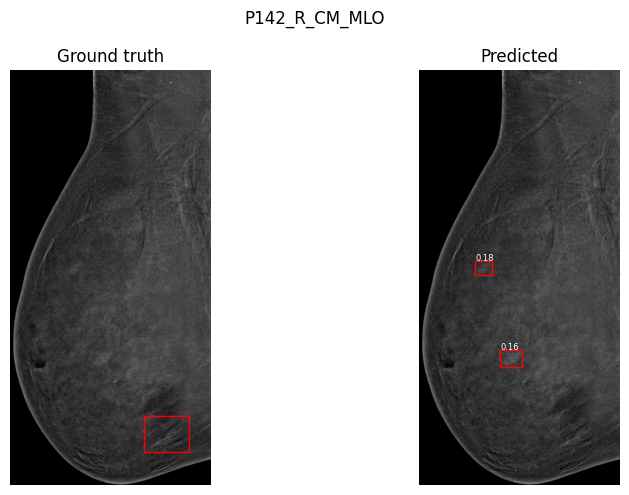

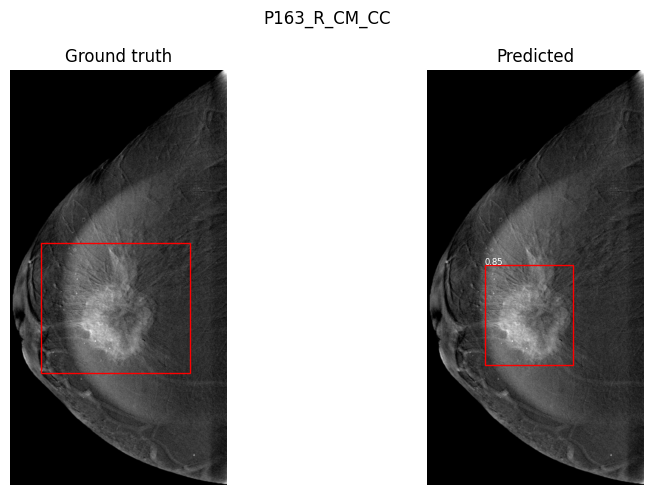

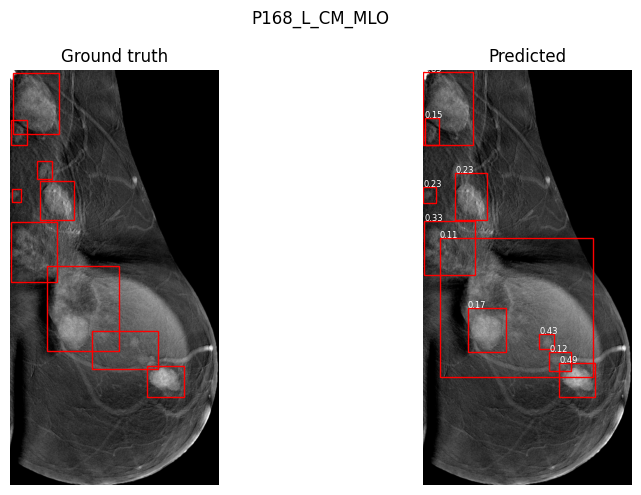

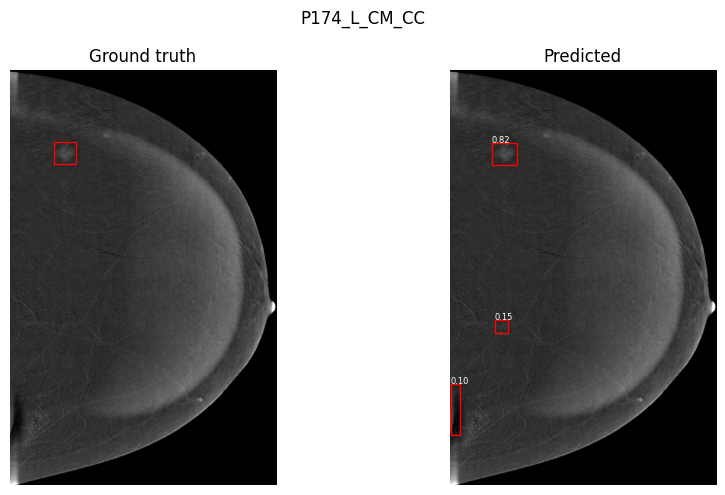

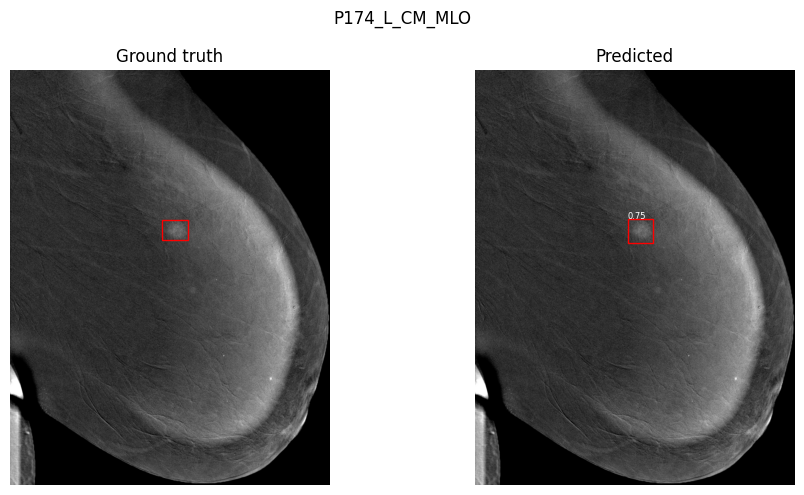

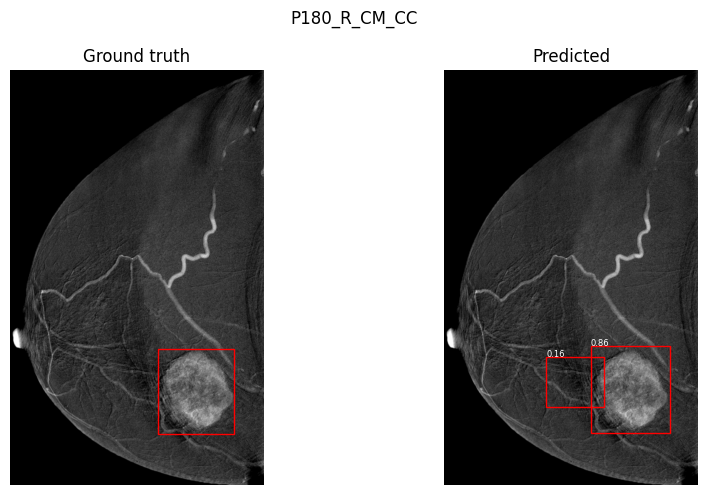

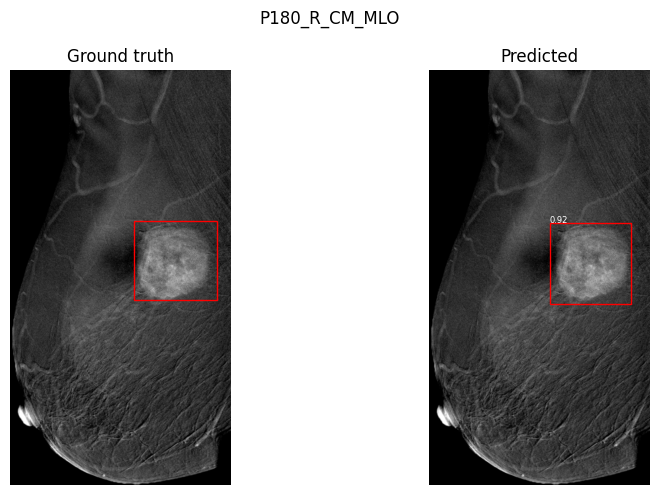

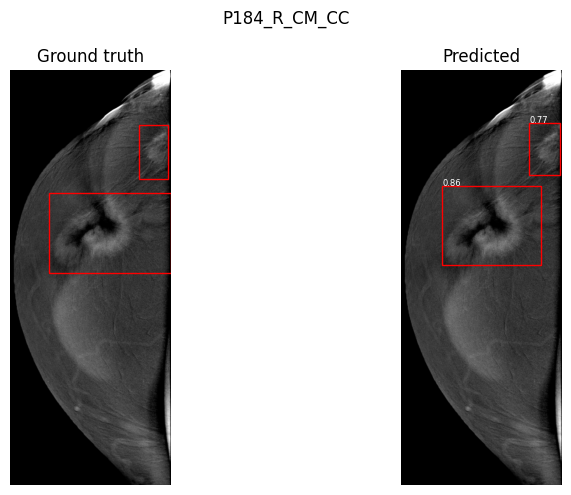

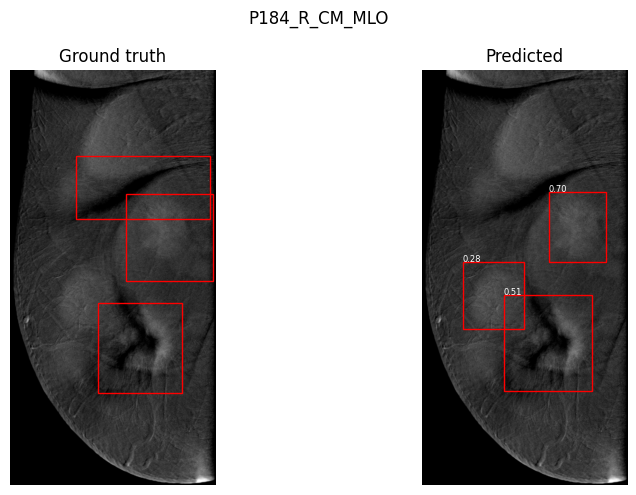

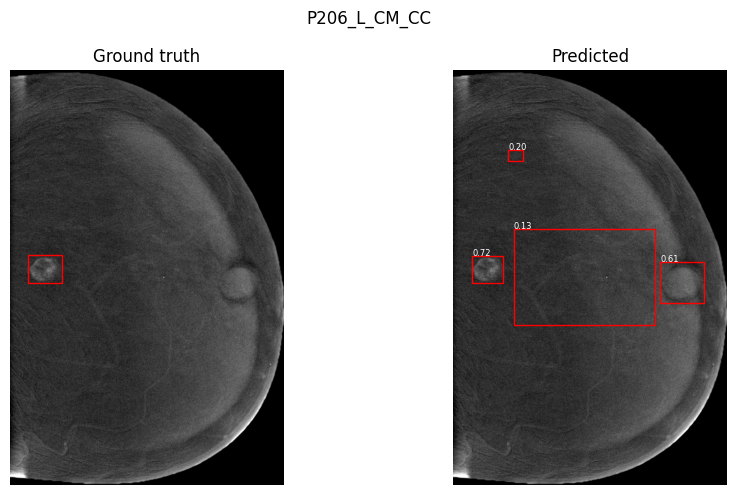

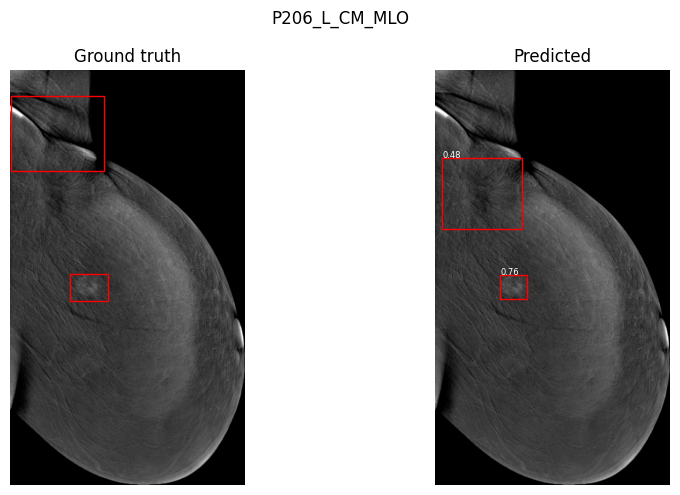

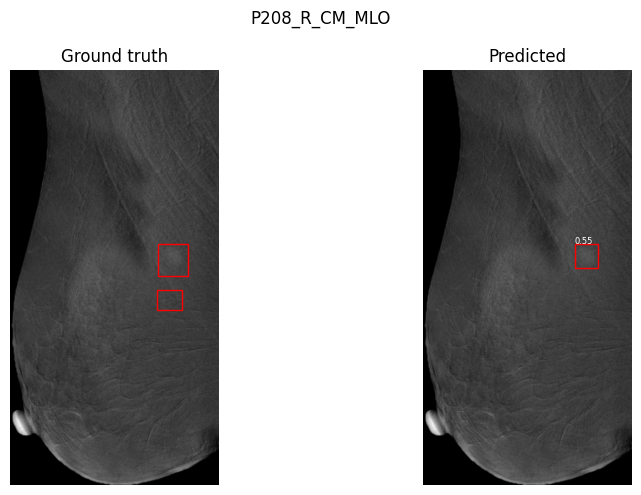

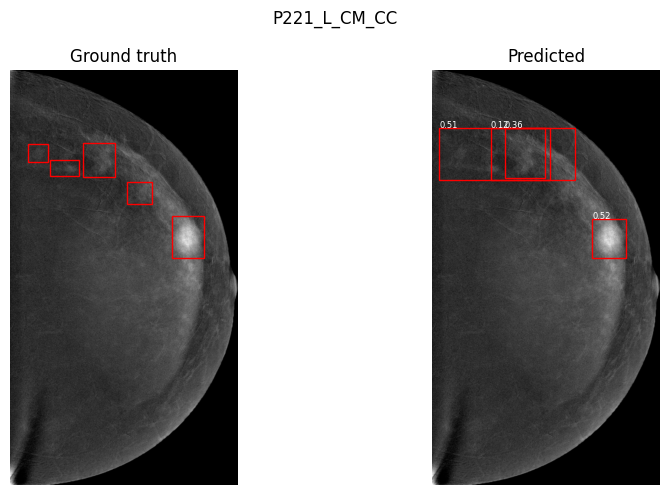

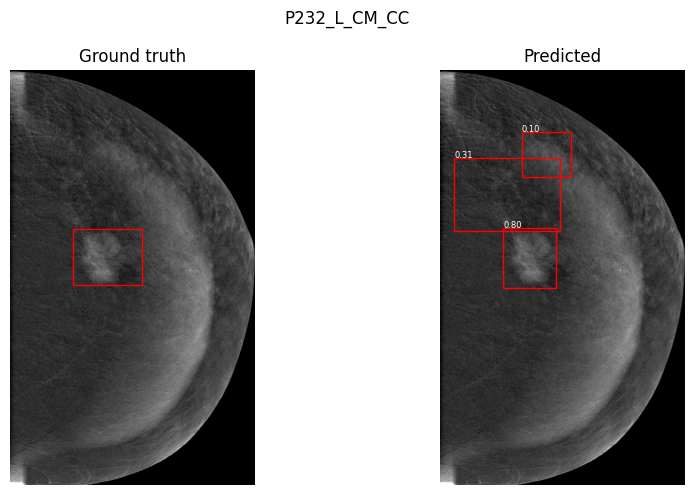

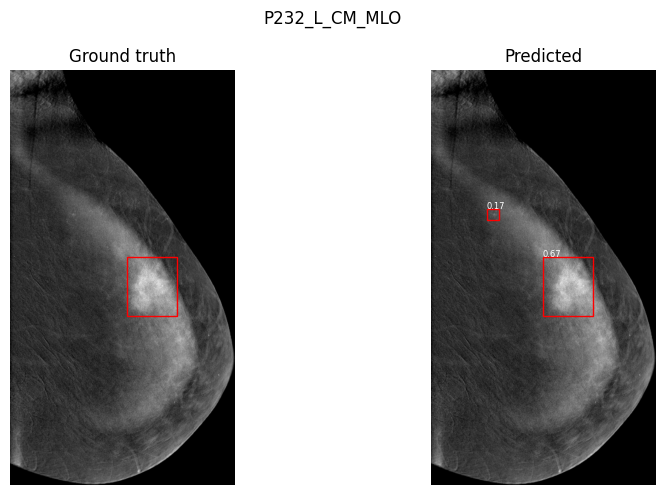

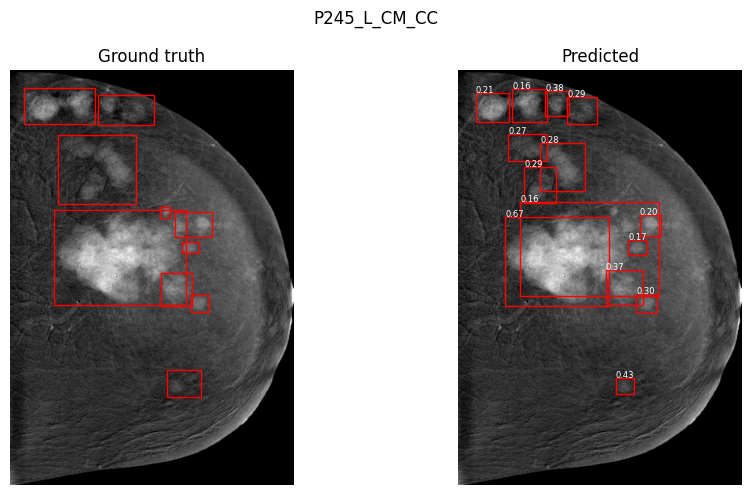

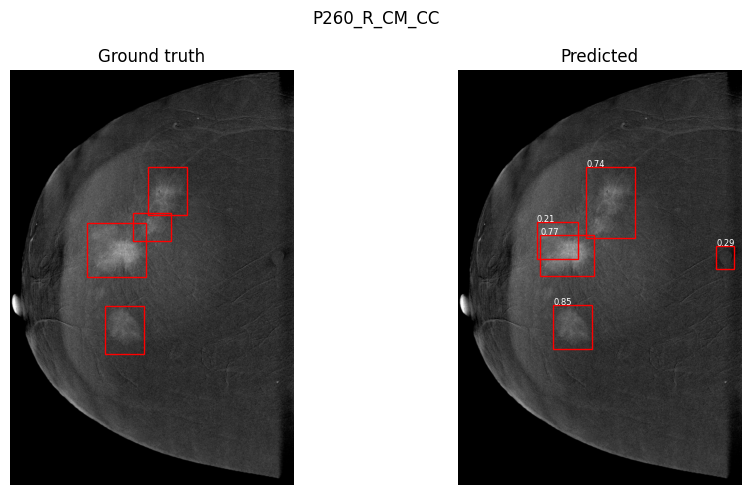

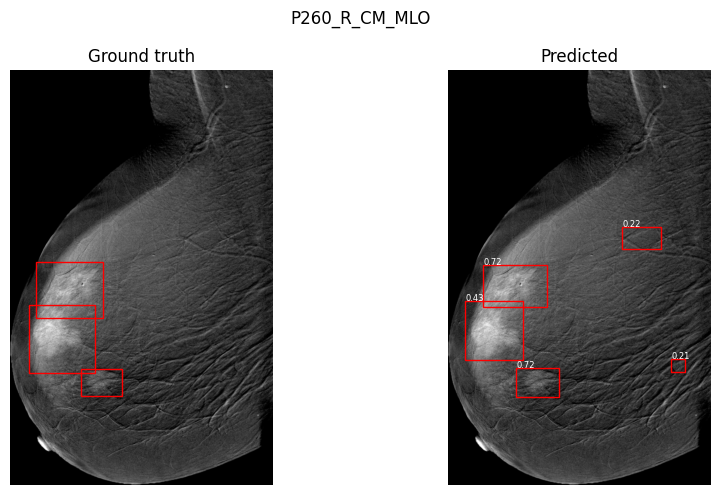

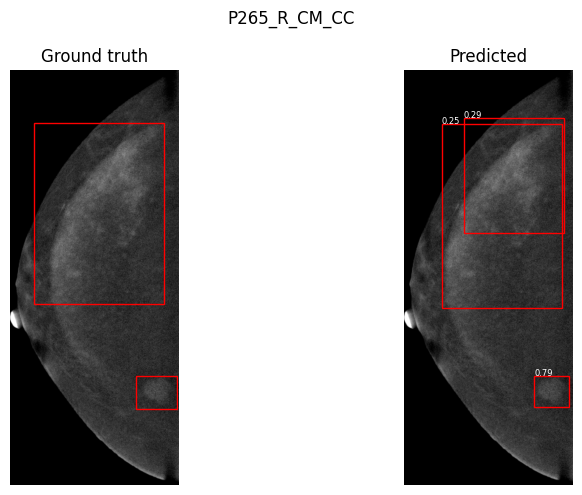

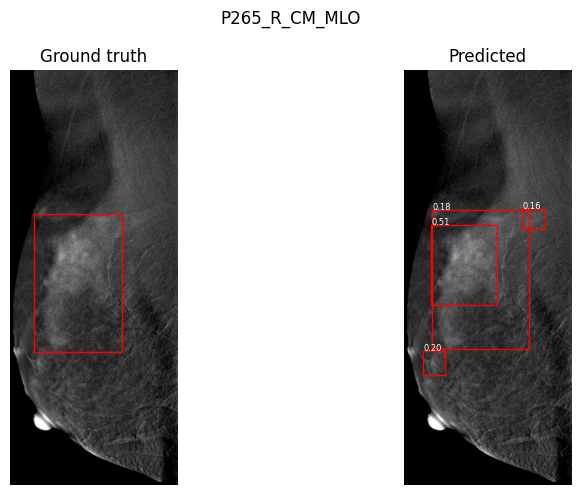

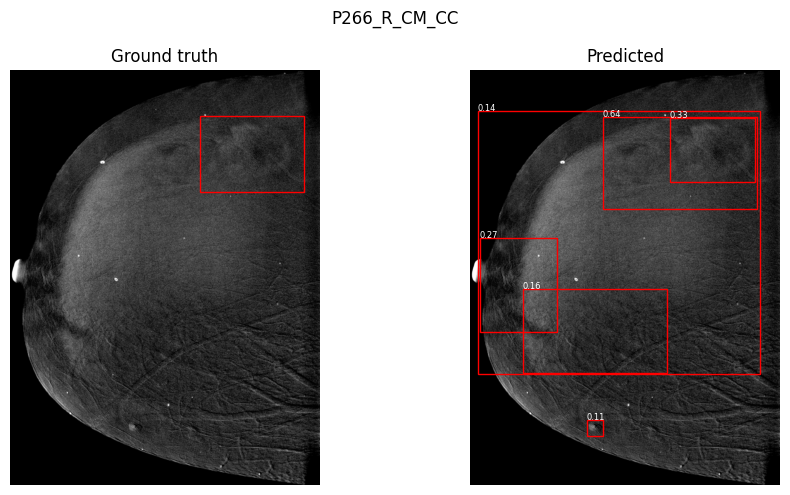

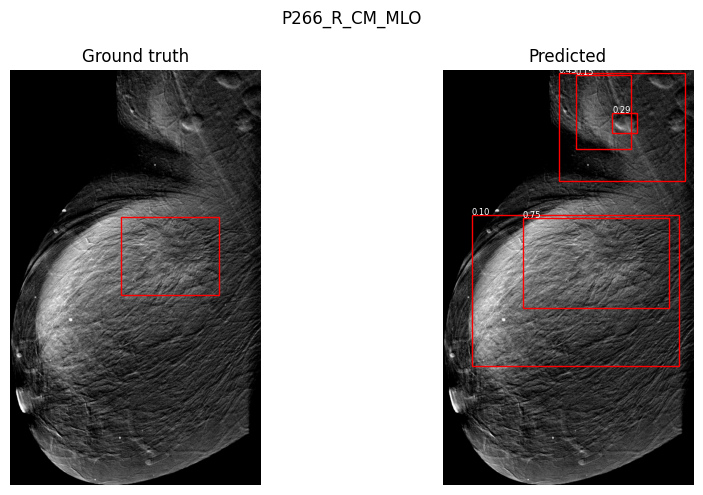

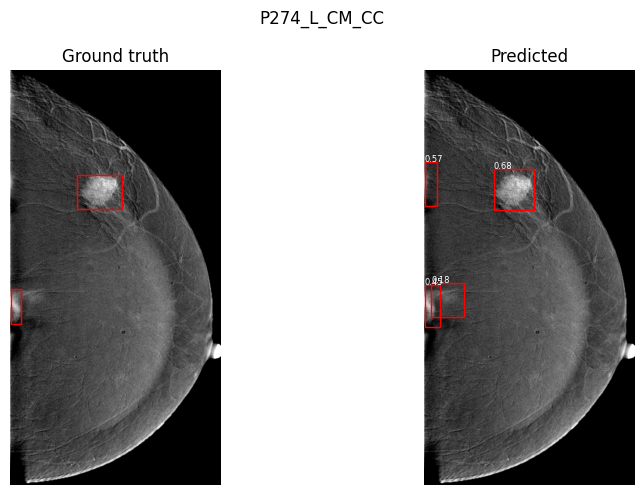

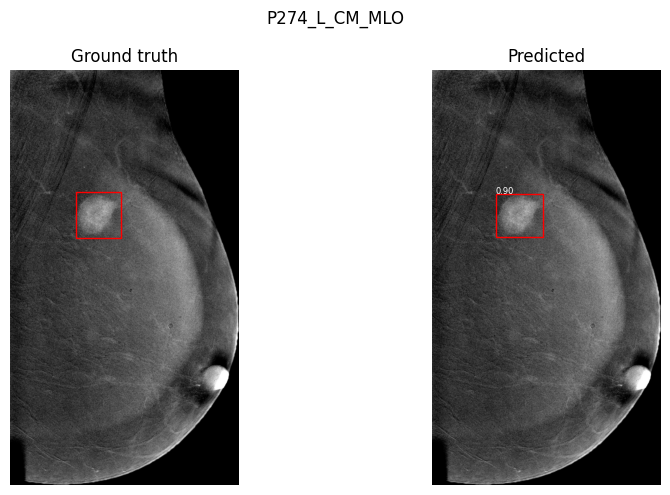

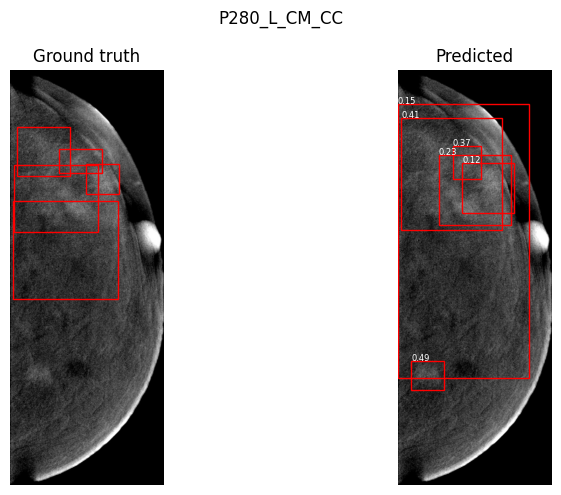

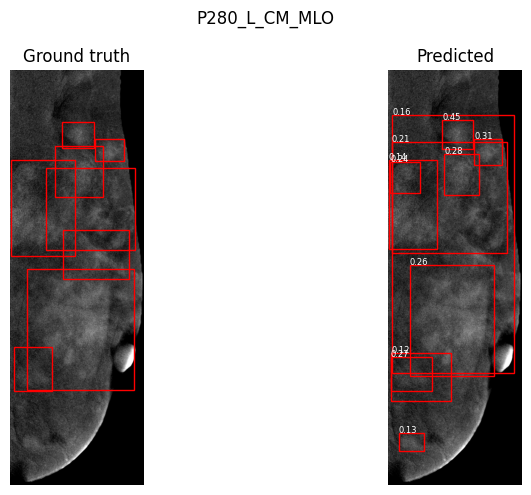

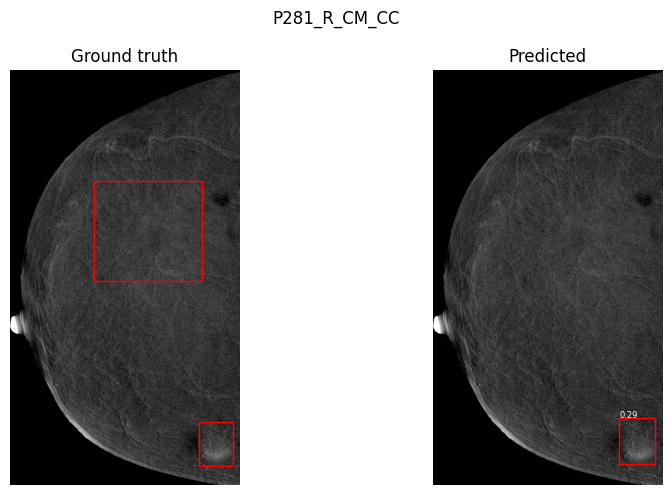

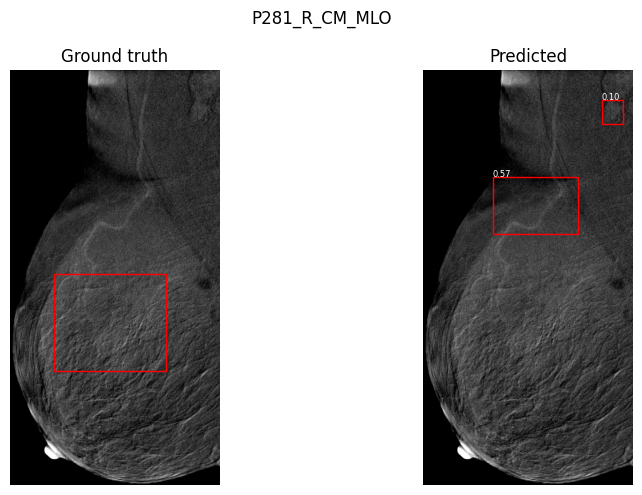

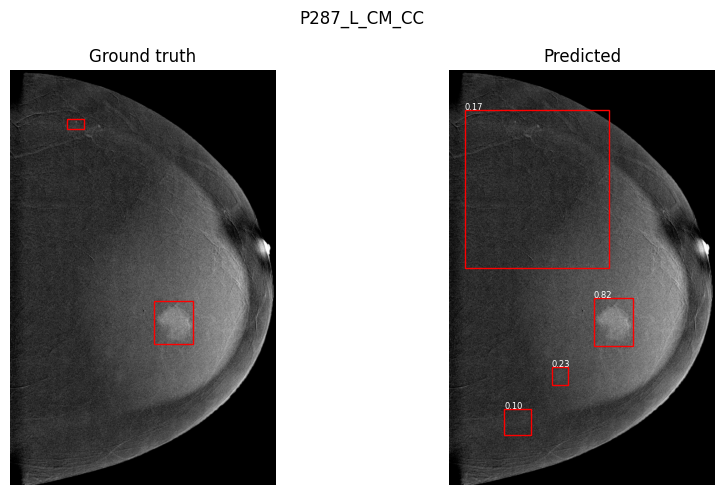

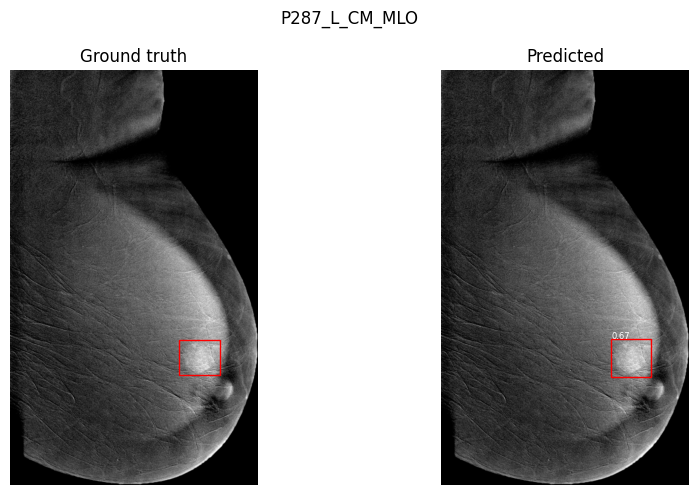

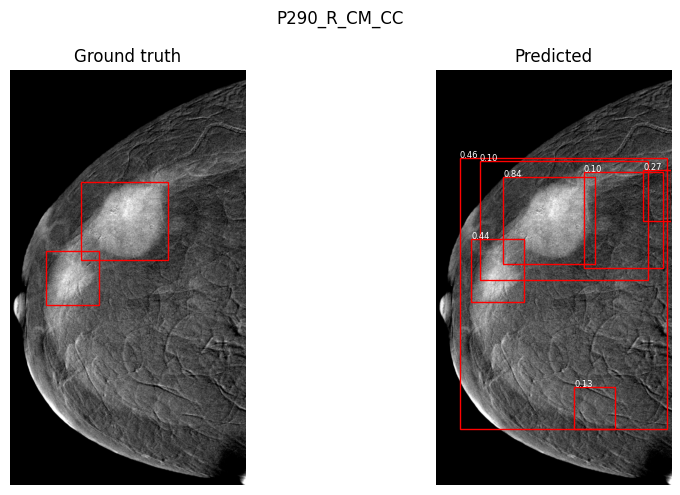

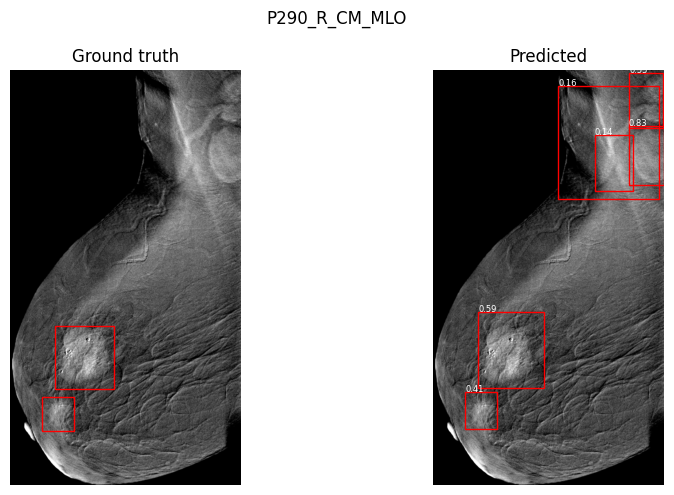

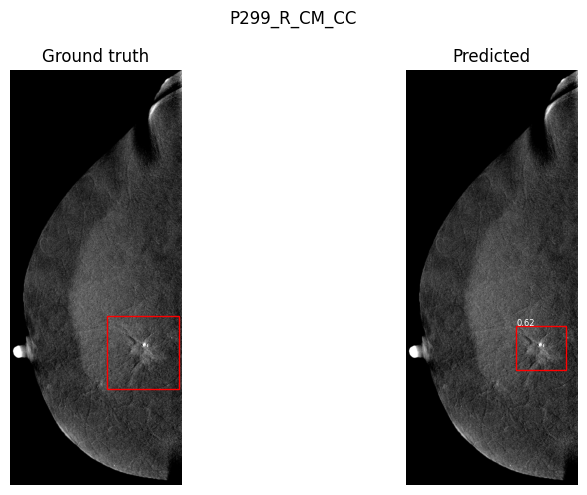

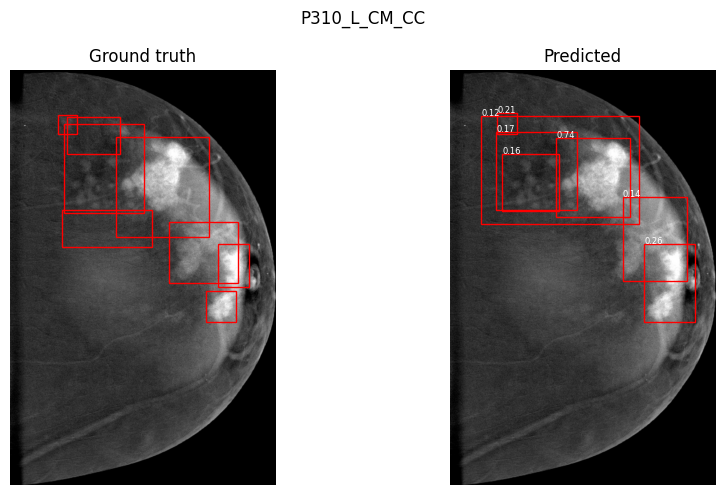

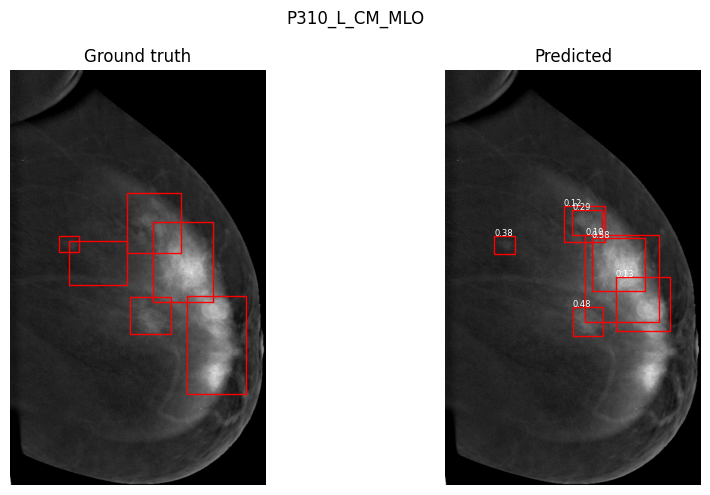

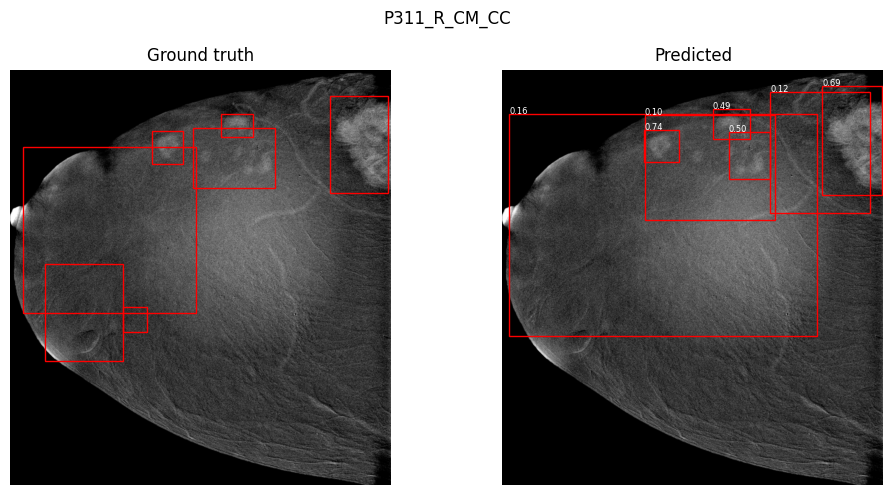

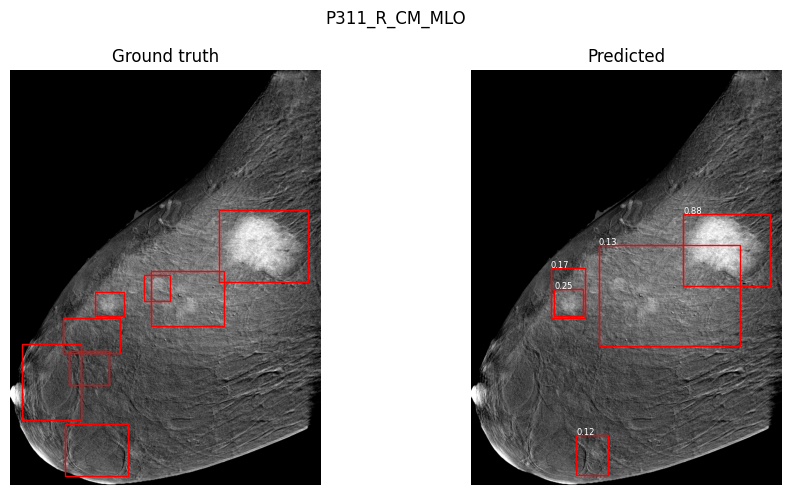

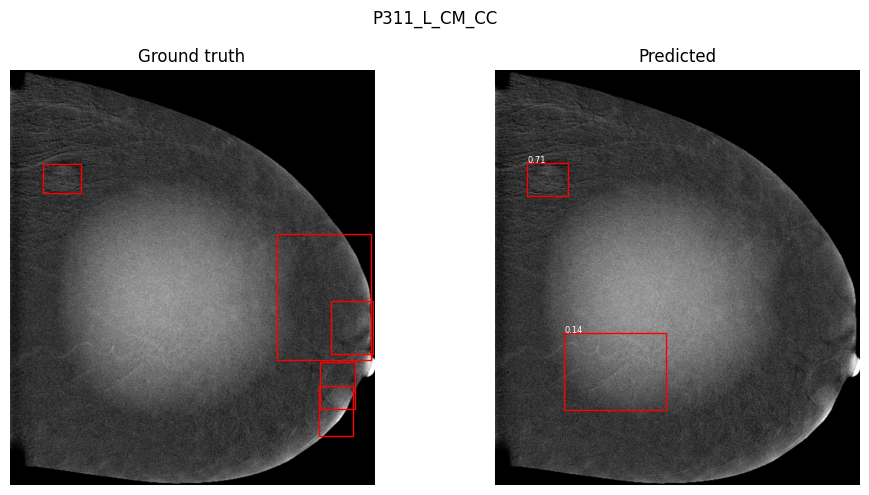

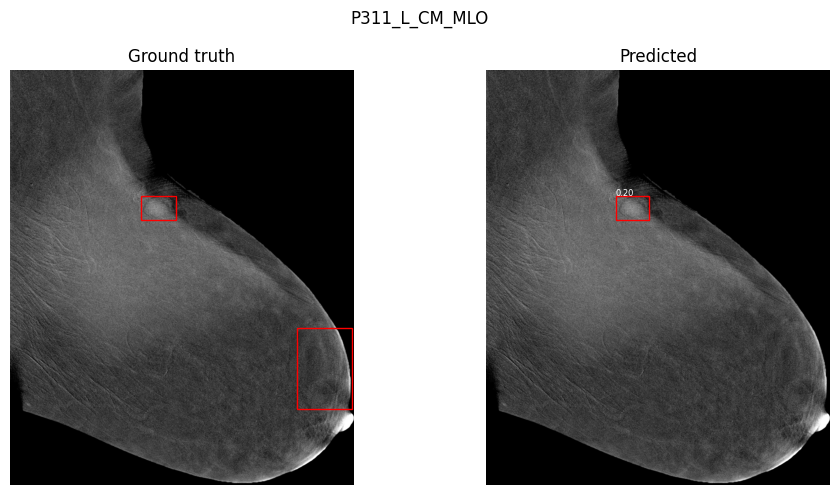

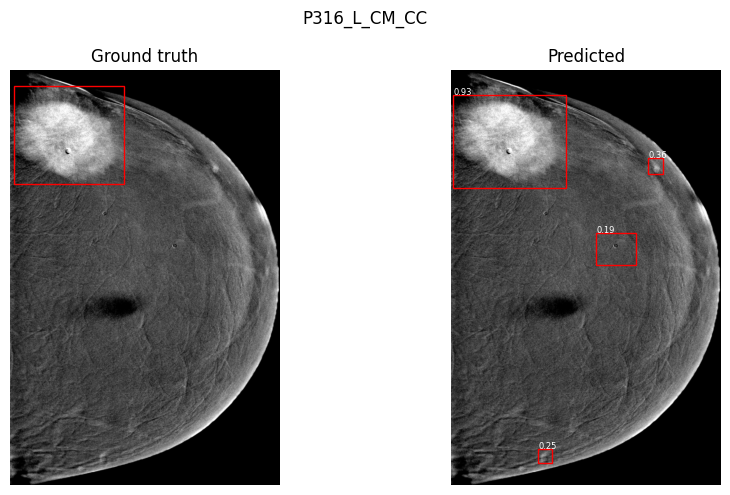

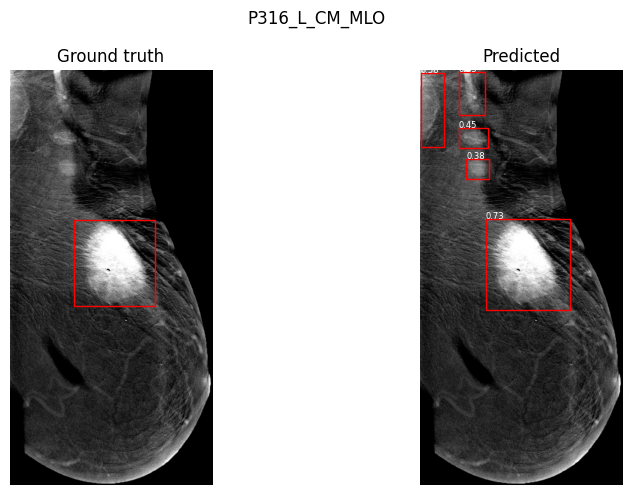

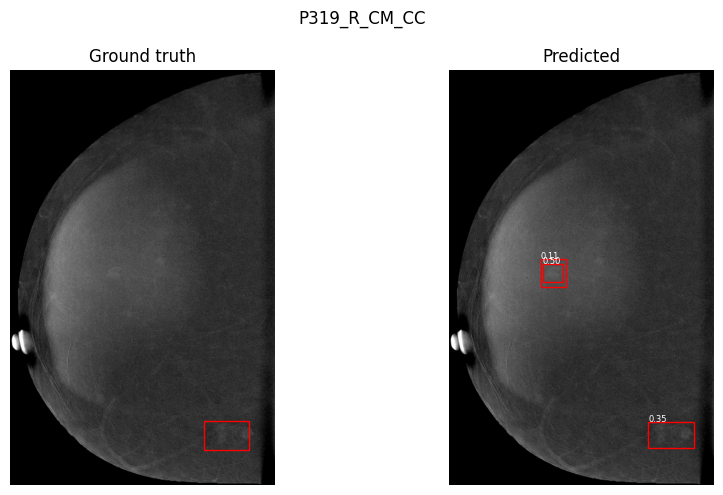

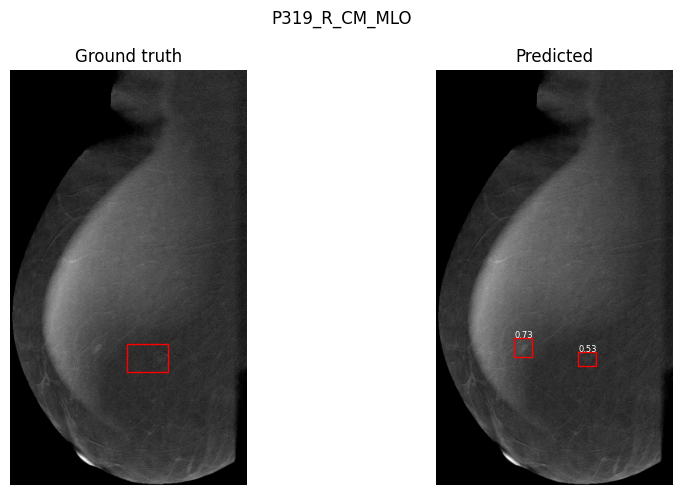

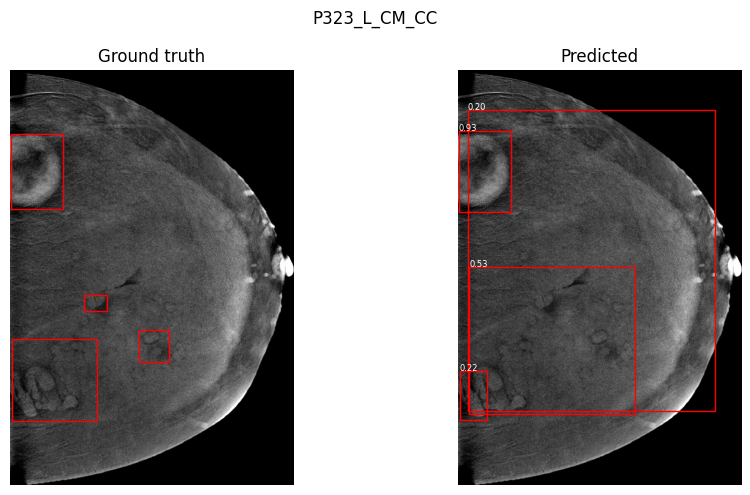

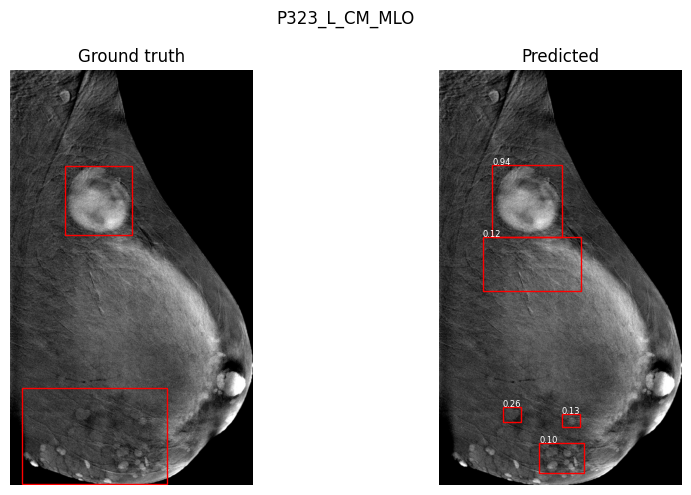

In [2]:
#### inputs (editable)
split_name = 'standard_split_wVal'
####

for metric_name in ['sensitivity']:

    # model inputs
    config_file = repo_path / 'detection/training/config_files/fine_tuning_CEM.yaml'
    min_score_test = 0.1 # minimum score threshold to keep the prediction
    min_score_val = 0.1 # minimum score threshold to keep the prediction

    # validation data inputs
    im_dir = repo_path / 'data/CDD-CESM/images/substracted' # images directory (can contain other not only test)
    # im_dir = repo_path / 'data/SET-Mex/images/substracted_jpg'
    metadata_path = repo_path / f'data/CDD-CESM/metadata/bboxes/split_1/test_set.csv' # test data only
    # metadata_path = repo_path / f'data/SET-Mex/metadata/SET_png_metadata.csv'

    # get best models of the split
    best_models_csv_path = repo_path / 'detection/evaluation/data/validation' / f'{split_name}/best_models/best_models_{metric_name}_{min_score_val}.csv'
    best_models_csv = pd.read_csv(best_models_csv_path)
    split_dir = repo_path / f'detection/training/results/{split_name}'


    for i, row in best_models_csv.iterrows():
        model_path = split_dir / row['model_type'] / f'{row["model_name"]}.pth'
        if 'fine-tuning' in row['model_type']:
            print(f'Using model {model_path}')
            # remove 
            detector = lesion_detector(config_file, model_path, metadata_path, im_dir, min_score_test)
            detector.start_metrics()
            for im_name in detector.test_df['image_name'].unique()[0:]:
                detector.c_im_name = im_name
                detector.prepare_im_gt()
                detector.predict()
                detector.show_c_predictions()
                
            
            

In [4]:
best_models_csv

model_type     model_name    metric
0           normal_fine-tuning_0.1  model_0002999  0.634304
1       synth_free-area_double_0.1  model_0000749  0.598706
2            synth_medium-area_0.1  model_0000499  0.611650
3           real_and_free-area_0.1  model_0002999  0.650485
4    real_and_free-area_double_0.1  model_0001999  0.647249
5  real_and_medium_area_normal_0.1  model_0000999  0.647249
6              synth_free-area_0.1  model_0000499  0.588997